# Import requirements

In [1]:
import sys
import numpy as np
from scipy.integrate import ode
import matplotlib.pyplot as plt
sys.path.append("../src/models")
sys.path.append("../src/utils")
from INapIKModel import INapIKModel
from plotFunctions import plotHighThresholdINapIKVectorField

# Perform model integration

## a. Define constants

In [2]:
i0 = 3.0
tauV = lambda v: 0.152
v0 = -63.8054                                                                                                                             
n0 = 0.0004
t0 = 0.0
t1 = 5.0
tf = 15.0
dt = 1e-5

## b. Create model and integrator

In [3]:
iPulseStrength = 1000000
iPulseWidth = 1*dt
def i(t):
    if t1-iPulseWidth/2<t and t<=t1+iPulseWidth/2:
        return(i0+iPulseStrength)
    return(i0)
iNapIKModel = INapIKModel.getHighThresholdInstance(tau=tauV)
iNapIKModel.setI(i=i)
integrator = ode(iNapIKModel.deriv).set_integrator('vode', max_step=dt)

## c. Perform integration

In [4]:
y0 = np.array([v0, n0])
integrator.set_initial_value(y0, t0)
nTSteps = round((tf-t0)/dt)
ys = np.empty((2, nTSteps+1))
ys[:, 0] = y0
t = t0
step = 0
successfulIntegration = True
times = np.empty(nTSteps+1)
while successfulIntegration and step<nTSteps:
    step = step+1
    if step%100000==0:
        print('Processing time %.05f out of %.02f' % (t, tf))
        sys.stdout.flush()
    integrator.integrate(t+dt)
    t = integrator.t
    y = integrator.y
    times[step] = t
    ys[:, step] = y

Processing time 0.99999 out of 15.00
Processing time 1.99999 out of 15.00
Processing time 2.99999 out of 15.00
Processing time 3.99999 out of 15.00
Processing time 4.99999 out of 15.00
Processing time 5.99999 out of 15.00
Processing time 6.99999 out of 15.00
Processing time 7.99999 out of 15.00
Processing time 8.99999 out of 15.00
Processing time 9.99999 out of 15.00
Processing time 10.99999 out of 15.00
Processing time 11.99999 out of 15.00
Processing time 12.99999 out of 15.00
Processing time 13.99999 out of 15.00
Processing time 14.99999 out of 15.00


# Plot phase space and voltages

<IPython.core.display.Javascript object>


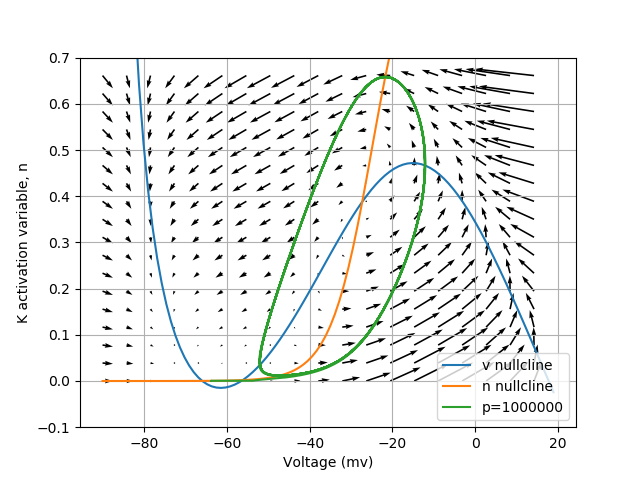

<IPython.core.display.Javascript object>


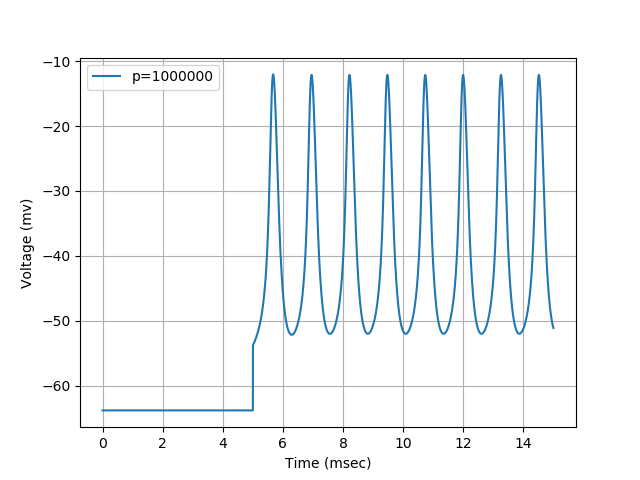

In [27]:
%matplotlib notebook

phaseFigFilename = 'figures/fig4-23PhaseSpace.eps'

plt.figure()
plotHighThresholdINapIKVectorField() 
plt.plot(ys[0, :], ys[1, :], label="p=%d"%iPulseStrength)
plt.grid()
plt.legend()
plt.xlabel('Voltage (mv)')
plt.ylabel('K activation variable, n')
ylim = plt.gca().get_ylim()
plt.ylim([-0.1, ylim[1]])
plt.savefig(phaseFigFilename)

voltageFigFilename = 'figures/fig4-23Voltage.eps'

plt.figure()
plt.plot(times, ys[0, :], label="p=%d"%iPulseStrength)
plt.grid()
plt.legend()
plt.xlabel('Time (msec)')
plt.ylabel('Voltage (mv)')
plt.savefig(voltageFigFilename)
